In [2]:
import numpy as np
import pandas as pd
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

from tqdm.notebook import tqdm_notebook as tqdm

import os

In [3]:
angry= r'C:\Users\harsh\Desktop\Animal_Emotion\Images\Angry/'
sad = r'C:\Users\harsh\Desktop\Animal_Emotion\Images\Sad/'
relaxed = r'C:\Users\harsh\Desktop\Animal_Emotion\Images\Relaxed/'
happy = r'C:\Users\harsh\Desktop\Animal_Emotion\Images\Happy/'


angry_path = os.listdir(angry)
sad_path = os.listdir(sad)
relaxed_path = os.listdir(relaxed)
happy_path = os.listdir(happy)

In [4]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

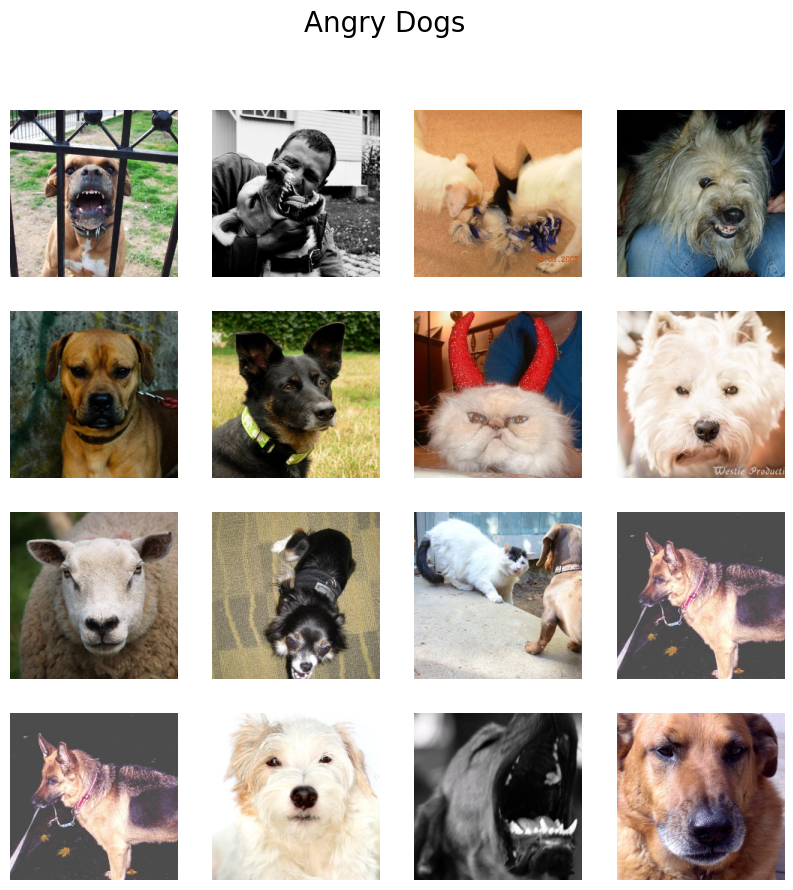

In [5]:
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(angry + angry_path[i]), cmap='gray')
    plt.suptitle("Angry Dogs",fontsize=20)
    plt.axis('off')

plt.show()

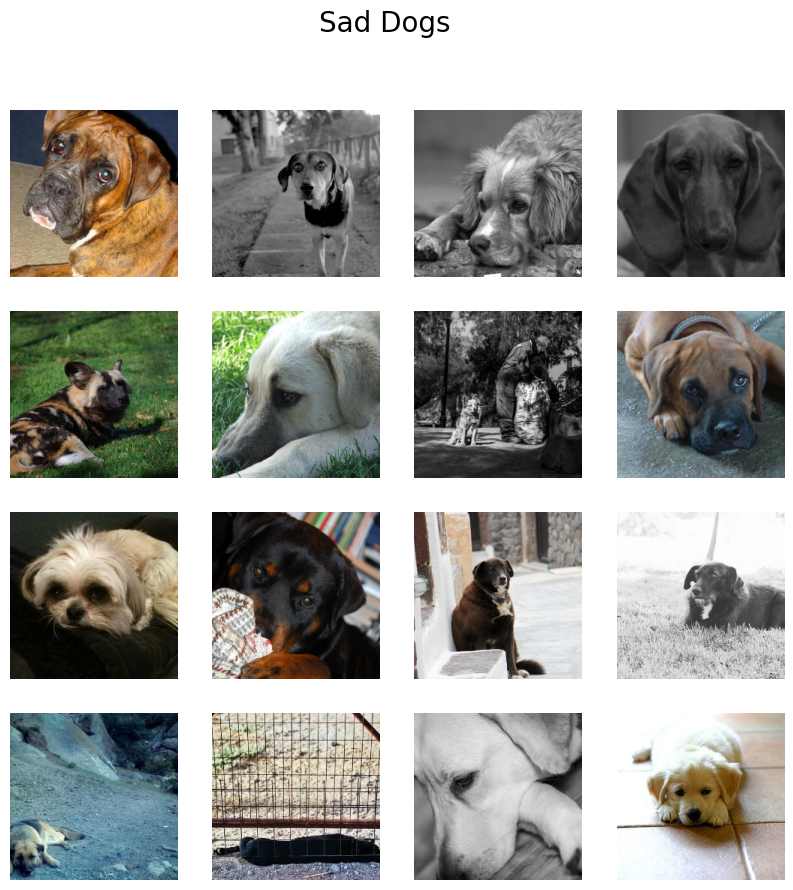

In [6]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(sad + sad_path[i]), cmap='gray')
    plt.suptitle("Sad Dogs",fontsize=20)
    plt.axis('off')

plt.show()


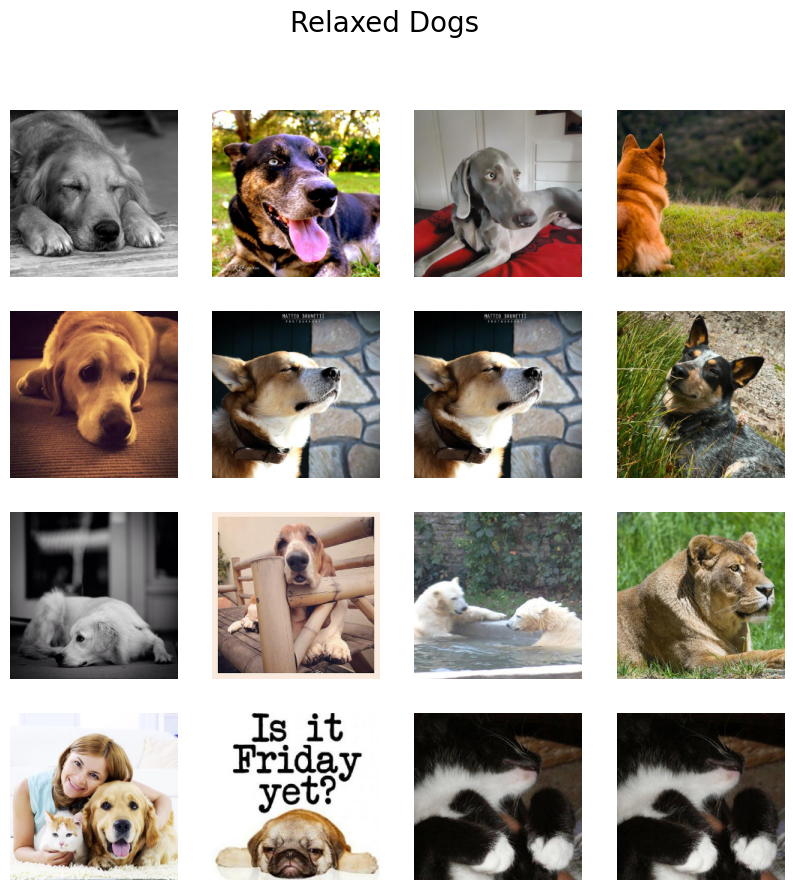

In [7]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(relaxed + relaxed_path[i]), cmap='gray')
    plt.suptitle("Relaxed Dogs",fontsize=20)
    plt.axis('off')

plt.show()


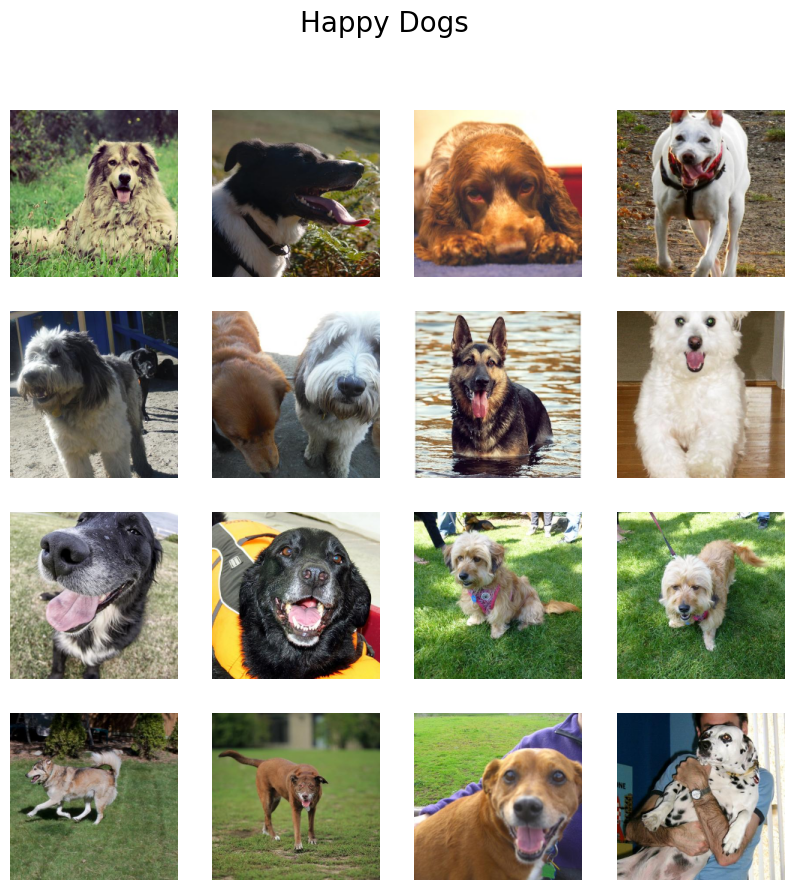

In [8]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(happy + happy_path[i]), cmap='gray')
    plt.suptitle("Happy Dogs",fontsize=20)
    plt.axis('off')

plt.show()

In [12]:
dataset_path = r"C:\Users\harsh\Desktop\Animal_Emotion\Images"
classes = ['happy', 'sad', 'angry', 'relaxed']

In [13]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.3)

In [14]:
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          classes=classes,
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          classes=classes,
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 183 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


In [15]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(96,96,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [16]:
vgg16_model.output[-1]

<KerasTensor shape=(3, 3, 512), dtype=float32, sparse=False, name=keras_tensor_19>

In [17]:
from tensorflow.keras.models import Model

for layer in vgg16_model.layers:
    layer.trainable = False

# Define the rest of the model
flatten_layer = Flatten()(vgg16_model.output)
output_layer = Dense(4, activation="sigmoid")(flatten_layer)

# Combine the VGG16 base model with custom output layers
model = Model(inputs=vgg16_model.input, outputs=output_layer)

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │          18,436 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,733,124 (56.20 MB)

 Trainable params: 18,436 (72.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001
checkpoint = ModelCheckpoint("model1.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
lr_callbacks = [checkpoint]

In [19]:
hist =  model.fit(train,
                    epochs=12,
                    callbacks=lr_callbacks,
                    validation_data=val)

Epoch 1/12


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.1519 - loss: 1.5780
Epoch 1: saving model to model1.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1560 - loss: 1.5684 - val_accuracy: 0.2692 - val_loss: 1.4496
Epoch 2/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.3106 - loss: 1.4036
Epoch 2: saving model to model1.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3115 - loss: 1.4046 - val_accuracy: 0.2308 - val_loss: 1.4541
Epoch 3/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.3264 - loss: 1.3970
Epoch 3: saving model to model1.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3282 - loss: 1.3964 - val_accuracy: 0.2821 - val_loss: 1.4336
Epoch 4/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.4173 - loss: 1.3384
Epoch 4: saving model to model1.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4131 - loss: 1.3424 - val_accuracy: 0.2564 - val_loss: 1.4303
Epoch 5/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - acc

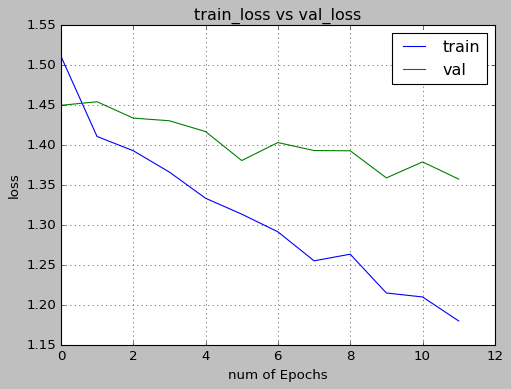

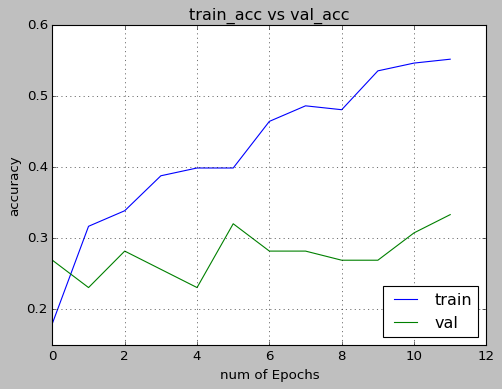

In [20]:
epochs = 12
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.style.use(['classic'])

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [21]:
model_json = model.to_json()
with open("model_a1.json","w") as json_file:
    json_file.write(model_json)